# Importar librerías y habilitar el uso de archivos de Drive

In [1]:
import numpy as np
import pickle
import time
import collections
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
#ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/clases.pkl','rb') as f: 
  datos1 = pickle.load(f)
    
Nombre , Clase1, Clase2, Periodo = datos1[0], datos1[1], datos1[2], datos1[3]

with open(ruta_base+'/features_list2_B.pkl','rb') as f: 
  features_B = pickle.load(f)
  
with open(ruta_base+'/features_list2_R.pkl','rb') as f:
  features_R = pickle.load(f)

In [3]:
t = np.zeros(len(Clase1), dtype=int)
for i in range(len(Clase1)):
  if Clase1[i]=='CEPH':
    t[i]=0
  elif Clase1[i]=='EB':
    t[i]=1
  else:
    t[i]=2

collections.Counter(t)

Counter({0: 2745, 1: 9255, 2: 16604})

In [0]:
import random
subsample=[]
for i in range(2500):
  r=random.randint(1,28604)
  if r not in subsample: subsample.append(r)
subsample.sort()

Unir las features con el Periodo

In [0]:
features_B = features_B.tolist()
for i in range(len(features_B)):
  #features_B[i] = features_B[i].tolist()
  features_B[i].insert(0,Periodo[i])
  features_B[i] = np.array(features_B[i])
  
features_B = np.array(features_B)

features_R = features_R.tolist()
for i in range(len(features_R)):
  #features_B[i] = features_B[i].tolist()
  features_R[i].insert(0,Periodo[i])
  features_R[i] = np.array(features_R[i])
  
features_R = np.array(features_R)

In [13]:
len(features_B[0])

24

# Análisis PCA de las características calculadas con FATS

**Análisis PCA para las características en banda Roja**

Se busca representar como mínimo el 85% de la varianza de los datos

In [14]:
pca = PCA(n_components=7)
X = StandardScaler().fit_transform(features_R) # normalizar las features
pca_features_R = pca.fit_transform(X)
print("Varianza explicada por los primeros componentes principales:")
print(pca.explained_variance_ratio_)
print("Suma acumulada de los primeros componentes principales: %f" % np.sum(pca.explained_variance_ratio_))

Varianza explicada por los primeros componentes principales:
[0.30049528 0.26282736 0.1045468  0.05884338 0.04534724 0.04351849
 0.03948576]
Suma acumulada de los primeros componentes principales: 0.855064


**Análisis PCA para las características en banda Azul**

Se busca representar como mínimo el 85% de los datos

In [15]:
pca = PCA(n_components=7)
X = StandardScaler().fit_transform(features_B) # normalizar las features
pca_features_B = pca.fit_transform(X)
print("Varianza explicada por los primeros componentes principales:")
print(pca.explained_variance_ratio_)
print("Suma acumulada de los primeros componentes principales: %f" % np.sum(pca.explained_variance_ratio_))

Varianza explicada por los primeros componentes principales:
[0.37449821 0.19400083 0.10837646 0.05428253 0.04576994 0.04222064
 0.0381349 ]
Suma acumulada de los primeros componentes principales: 0.857284


# Clustering con Features y Periodo

## K-Means

Banda Roja

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_features_R)
labels_kmeans_R = kmeans.labels_
collections.Counter(labels_kmeans_R)

Counter({0: 2903, 1: 10783, 2: 14918})

In [66]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_kmeans_R==0)
Cluster1, = np.where(labels_kmeans_R==1)
Cluster2, = np.where(labels_kmeans_R==2)

t_0 = t[Cluster0]
print(collections.Counter(t_0))
t_1 = t[Cluster1]
print(collections.Counter(t_1))
t_2 = t[Cluster2]
print(collections.Counter(t_2))

print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Counter({2: 2407, 1: 494, 0: 2})
Counter({1: 7605, 2: 3097, 0: 81})
Counter({2: 11100, 0: 2662, 1: 1156})
Primer Cluster
     Cefeidas: 2
     Binarias eclipsantes: 494
     RR Lyrae: 2407

Segundo Cluster
     Cefeidas: 81
     Binarias eclipsantes: 7605
     RR Lyrae: 3097

Tercer Cluster
     Cefeidas: 2662
     Binarias eclipsantes: 1156
     RR Lyrae: 11100



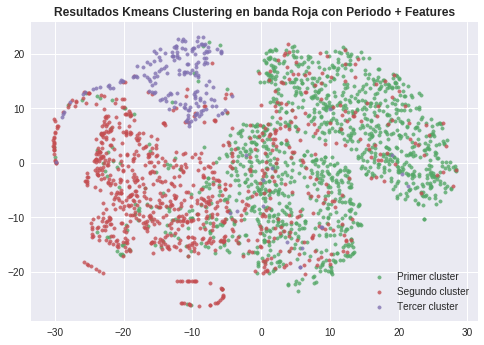

In [87]:
ruta_tsne= 'gdrive/My Drive/Inteligencia Computacional/Proyecto/Proyecciones tSNE/'
with open(ruta_tsne+'tSNE_LC_periodo.pkl','rb') as f: 
  tSNE = pickle.load(f)
  
Cluster_0 = []
Cluster_1 = []
Cluster_2 = []
for i in subsample:
  if i in Cluster0:
    Cluster_0.append(i)
  if i in Cluster1:
    Cluster_1.append(i)
  if i in Cluster2:
    Cluster_2.append(i)

x_tsne = tSNE[0]
y_tsne = tSNE[1]
plt.scatter(x_tsne[Cluster_0], y_tsne[Cluster_0],marker='.', c='C1', alpha=0.8, label='Primer cluster')
plt.scatter(x_tsne[Cluster_1], y_tsne[Cluster_1],marker='.', c='C2', alpha=0.8, label='Segundo cluster')
plt.scatter(x_tsne[Cluster_2], y_tsne[Cluster_2],marker='.', c='C3', alpha=0.8, label='Tercer cluster')
plt.legend()
plt.title('Resultados Kmeans Clustering en banda Roja con Periodo + Features',fontweight='bold')

plt.savefig('kmeans_R.eps',dpi=300,format='eps')

Banda Azul

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_features_B)
labels_kmeans_B = kmeans.labels_
collections.Counter(labels_kmeans_B)

Counter({0: 6298, 1: 13593, 2: 8713})

In [88]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_kmeans_B==0)
Cluster1, = np.where(labels_kmeans_B==1)
Cluster2, = np.where(labels_kmeans_B==2)

# 
t_0 = t[Cluster0]
#print(collections.Counter(t_0))
t_1 = t[Cluster1]
#print(collections.Counter(t_1))
t_2 = t[Cluster2]
#print(collections.Counter(t_2))
print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Primer Cluster
     Cefeidas: 102
     Binarias eclipsantes: 212
     RR Lyrae: 5984

Segundo Cluster
     Cefeidas: 2616
     Binarias eclipsantes: 1039
     RR Lyrae: 9938

Tercer Cluster
     Cefeidas: 27
     Binarias eclipsantes: 8004
     RR Lyrae: 682



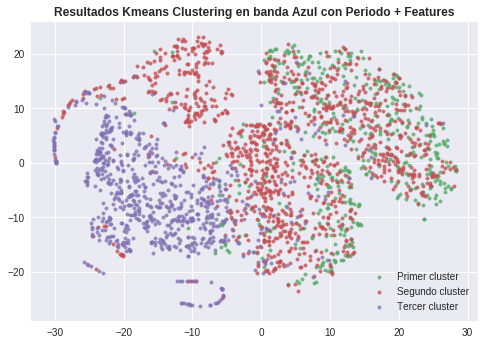

In [89]:
ruta_tsne= 'gdrive/My Drive/Inteligencia Computacional/Proyecto/Proyecciones tSNE/'
with open(ruta_tsne+'tSNE_LC_periodo.pkl','rb') as f: 
  tSNE = pickle.load(f)
  
Cluster_0 = []
Cluster_1 = []
Cluster_2 = []
for i in subsample:
  if i in Cluster0:
    Cluster_0.append(i)
  if i in Cluster1:
    Cluster_1.append(i)
  if i in Cluster2:
    Cluster_2.append(i)

x_tsne = tSNE[0]
y_tsne = tSNE[1]
plt.scatter(x_tsne[Cluster_0], y_tsne[Cluster_0],marker='.', c='C1', alpha=0.8, label='Primer cluster')
plt.scatter(x_tsne[Cluster_1], y_tsne[Cluster_1],marker='.', c='C2', alpha=0.8, label='Segundo cluster')
plt.scatter(x_tsne[Cluster_2], y_tsne[Cluster_2],marker='.', c='C3', alpha=0.8, label='Tercer cluster')
plt.legend()
plt.title('Resultados Kmeans Clustering en banda Azul con Periodo + Features',fontweight='bold')

plt.savefig('kmeans_B.eps',dpi=300,format='eps')

## Aglomerative clustering

Banda Roja

In [84]:
from sklearn.cluster import AgglomerativeClustering
X = pca_features_R
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
labels_aglom_R = clustering.labels_
collections.Counter(labels_aglom_R)

Counter({0: 15516, 1: 10782, 2: 2306})

In [85]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_aglom_R==0)
Cluster1, = np.where(labels_aglom_R==1)
Cluster2, = np.where(labels_aglom_R==2)

# 
t_0 = t[Cluster0]
#print(collections.Counter(t_0))
t_1 = t[Cluster1]
#print(collections.Counter(t_1))
t_2 = t[Cluster2]
#print(collections.Counter(t_2))
print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Primer Cluster
     Cefeidas: 138
     Binarias eclipsantes: 2040
     RR Lyrae: 13338

Segundo Cluster
     Cefeidas: 403
     Binarias eclipsantes: 7172
     RR Lyrae: 3207

Tercer Cluster
     Cefeidas: 2204
     Binarias eclipsantes: 43
     RR Lyrae: 59



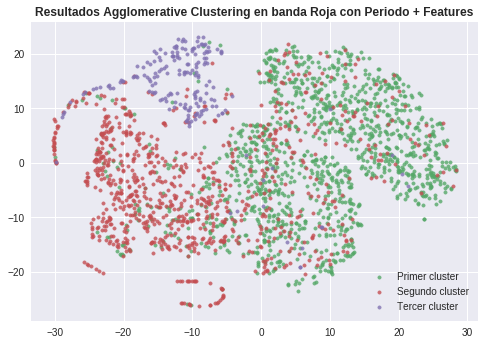

In [86]:
ruta_tsne= 'gdrive/My Drive/Inteligencia Computacional/Proyecto/Proyecciones tSNE/'
with open(ruta_tsne+'tSNE_LC_periodo.pkl','rb') as f: 
  tSNE = pickle.load(f)
  
Cluster_0 = []
Cluster_1 = []
Cluster_2 = []
for i in subsample:
  if i in Cluster0:
    Cluster_0.append(i)
  if i in Cluster1:
    Cluster_1.append(i)
  if i in Cluster2:
    Cluster_2.append(i)

x_tsne = tSNE[0]
y_tsne = tSNE[1]
plt.scatter(x_tsne[Cluster_0], y_tsne[Cluster_0],marker='.', c='C1', alpha=0.8, label='Primer cluster')
plt.scatter(x_tsne[Cluster_1], y_tsne[Cluster_1],marker='.', c='C2', alpha=0.8, label='Segundo cluster')
plt.scatter(x_tsne[Cluster_2], y_tsne[Cluster_2],marker='.', c='C3', alpha=0.8, label='Tercer cluster')
plt.legend()
plt.title('Resultados Agglomerative Clustering en banda Roja con Periodo + Features',fontweight='bold')

plt.savefig('agglomerative_R.eps',dpi=300,format='eps')

Banda Azul

In [79]:
from sklearn.cluster import AgglomerativeClustering
X = pca_features_B
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
labels_aglom_B = clustering.labels_
collections.Counter(labels_aglom_B)

Counter({0: 8706, 1: 6340, 2: 13558})

In [80]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_aglom_B==0)
Cluster1, = np.where(labels_aglom_B==1)
Cluster2, = np.where(labels_aglom_B==2)

# 
t_0 = t[Cluster0]
#print(collections.Counter(t_0))
t_1 = t[Cluster1]
#print(collections.Counter(t_1))
t_2 = t[Cluster2]
#print(collections.Counter(t_2))
print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Primer Cluster
     Cefeidas: 68
     Binarias eclipsantes: 7937
     RR Lyrae: 701

Segundo Cluster
     Cefeidas: 7
     Binarias eclipsantes: 93
     RR Lyrae: 6240

Tercer Cluster
     Cefeidas: 2670
     Binarias eclipsantes: 1225
     RR Lyrae: 9663



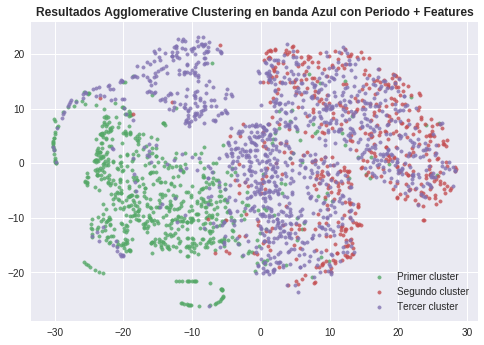

In [83]:
ruta_tsne= 'gdrive/My Drive/Inteligencia Computacional/Proyecto/Proyecciones tSNE/'
with open(ruta_tsne+'tSNE_LC_periodo.pkl','rb') as f: 
  tSNE = pickle.load(f)
  
Cluster_0 = []
Cluster_1 = []
Cluster_2 = []
for i in subsample:
  if i in Cluster0:
    Cluster_0.append(i)
  if i in Cluster1:
    Cluster_1.append(i)
  if i in Cluster2:
    Cluster_2.append(i)

x_tsne = tSNE[0]
y_tsne = tSNE[1]
plt.scatter(x_tsne[Cluster_0], y_tsne[Cluster_0],marker='.', c='C1', alpha=0.8, label='Primer cluster')
plt.scatter(x_tsne[Cluster_1], y_tsne[Cluster_1],marker='.', c='C2', alpha=0.8, label='Segundo cluster')
plt.scatter(x_tsne[Cluster_2], y_tsne[Cluster_2],marker='.', c='C3', alpha=0.8, label='Tercer cluster')
plt.legend()
plt.title('Resultados Agglomerative Clustering en banda Azul con Periodo + Features',fontweight='bold')

plt.savefig('agglomerative_B.eps',dpi=300,format='eps')

# Clustering con Periodo + Curvas de luz

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
#ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/LC_fase_B.pkl','rb') as f: 
  magB = pickle.load(f)
  
with open(ruta_base+'/LC_fase_R.pkl','rb') as f: 
  magR = pickle.load(f)
  
with open(ruta_base+'/datos.pkl','rb') as f:
  datos =  pickle.load(f)
  
Periodo = datos[1]
del datos

In [0]:
for i in range(len(magB)):
  magB[i]=magB[i].tolist()
  magB[i].insert(0,Periodo[i])
  magB[i]=np.array(magB[i])
  
magB = np.array(magB)

for i in range(len(magR)):
  magR[i]=magR[i].tolist()
  magR[i].insert(0,Periodo[i])
  magR[i]=np.array(magR[i])
  
magR = np.array(magR)

## K-Means


### Banda Roja

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(magR)
labels_kmeans_LC_R = kmeans.labels_
collections.Counter(labels_kmeans_LC_R)

Counter({0: 28165, 1: 74, 2: 365})

In [49]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_kmeans_LC_R==0)
Cluster1, = np.where(labels_kmeans_LC_R==1)
Cluster2, = np.where(labels_kmeans_LC_R==2)

# 
t_0 = t[Cluster0]
#print(collections.Counter(t_0))
t_1 = t[Cluster1]
#print(collections.Counter(t_1))
t_2 = t[Cluster2]
#print(collections.Counter(t_2))
print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Primer Cluster
     Cefeidas: 2743
     Binarias eclipsantes: 8855
     RR Lyrae: 16567

Segundo Cluster
     Cefeidas: 2
     Binarias eclipsantes: 55
     RR Lyrae: 17

Tercer Cluster
     Cefeidas: 0
     Binarias eclipsantes: 345
     RR Lyrae: 20



Text(0.5,1,'Visualización t-SNE en banda Roja con Periodo + Curva de luz')

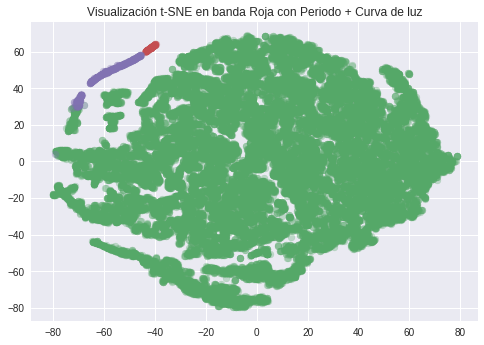

In [0]:
with open(ruta_tsne+'tsne_features_B.pkl','rb') as f: 
  tSNE = pickle.load(f)
  
x_tsne = tSNE[:,0]
y_tsne = tSNE[:,1]
plt.scatter(x_tsne[Cluster0], y_tsne[Cluster0], c='C1', alpha=0.3)
plt.scatter(x_tsne[Cluster1], y_tsne[Cluster1], c='C2', alpha=0.3)
plt.scatter(x_tsne[Cluster2], y_tsne[Cluster2], c='C3', alpha=0.3)
plt.title('Visualización t-SNE en banda Roja con Periodo + Curva de luz')

### Banda Azul

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(magB)
labels_kmeans_LC_B = kmeans.labels_
collections.Counter(labels_kmeans_LC_B)

Counter({0: 28165, 1: 365, 2: 74})

In [51]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_kmeans_LC_B==0)
Cluster1, = np.where(labels_kmeans_LC_B==1)
Cluster2, = np.where(labels_kmeans_LC_B==2)

# 
t_0 = t[Cluster0]
#print(collections.Counter(t_0))
t_1 = t[Cluster1]
#print(collections.Counter(t_1))
t_2 = t[Cluster2]
#print(collections.Counter(t_2))
print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Primer Cluster
     Cefeidas: 2743
     Binarias eclipsantes: 8855
     RR Lyrae: 16567

Segundo Cluster
     Cefeidas: 0
     Binarias eclipsantes: 345
     RR Lyrae: 20

Tercer Cluster
     Cefeidas: 2
     Binarias eclipsantes: 55
     RR Lyrae: 17



Text(0.5,1,'Visualización t-SNE en banda Roja con Periodo + Curva de luz')

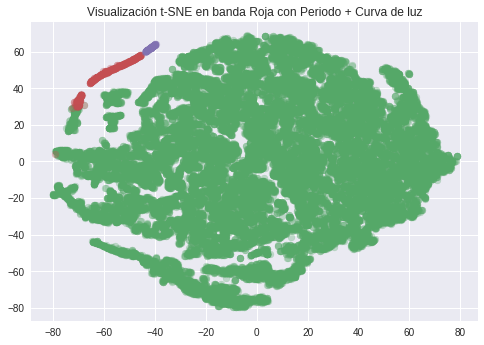

In [0]:
with open(ruta_tsne+'tsne_features_B.pkl','rb') as f: 
  tSNE = pickle.load(f)
  
x_tsne = tSNE[:,0]
y_tsne = tSNE[:,1]
plt.scatter(x_tsne[Cluster0], y_tsne[Cluster0], c='C1', alpha=0.3)
plt.scatter(x_tsne[Cluster1], y_tsne[Cluster1], c='C2', alpha=0.3)
plt.scatter(x_tsne[Cluster2], y_tsne[Cluster2], c='C3', alpha=0.3)
plt.title('Visualización t-SNE en banda Roja con Periodo + Curva de luz')

## Aglomerative clustering

### Banda Roja

In [56]:
from sklearn.cluster import AgglomerativeClustering
X = magR
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
labels_aglom_LC_R = clustering.labels_
collections.Counter(labels_aglom_LC_R)

Counter({0: 96, 1: 689, 2: 27819})

In [57]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_aglom_LC_R==0)
Cluster1, = np.where(labels_aglom_LC_R==1)
Cluster2, = np.where(labels_aglom_LC_R==2)

# 
t_0 = t[Cluster0]
#print(collections.Counter(t_0))
t_1 = t[Cluster1]
#print(collections.Counter(t_1))
t_2 = t[Cluster2]
#print(collections.Counter(t_2))
print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Primer Cluster
     Cefeidas: 2
     Binarias eclipsantes: 71
     RR Lyrae: 23

Segundo Cluster
     Cefeidas: 23
     Binarias eclipsantes: 650
     RR Lyrae: 16

Tercer Cluster
     Cefeidas: 2720
     Binarias eclipsantes: 8534
     RR Lyrae: 16565



Text(0.5,1,'Visualización t-SNE en banda Roja con Periodo + Curva de luz')

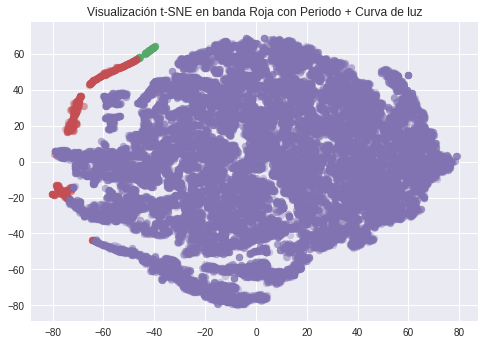

In [0]:
x_tsne = tSNE[:,0]
y_tsne = tSNE[:,1]
plt.scatter(x_tsne[Cluster0], y_tsne[Cluster0], c='C1', alpha=0.3)
plt.scatter(x_tsne[Cluster1], y_tsne[Cluster1], c='C2', alpha=0.3)
plt.scatter(x_tsne[Cluster2], y_tsne[Cluster2], c='C3', alpha=0.3)
plt.title('Visualización t-SNE en banda Roja con Periodo + Curva de luz')

### Banda Azul

In [58]:
from sklearn.cluster import AgglomerativeClustering
X = magB
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
labels_aglom_LC_B = clustering.labels_
collections.Counter(labels_aglom_LC_B)

Counter({0: 74, 1: 423, 2: 28107})

In [59]:
# indices de estrellas en cada cluster
Cluster0, = np.where(labels_aglom_LC_B==0)
Cluster1, = np.where(labels_aglom_LC_B==1)
Cluster2, = np.where(labels_aglom_LC_B==2)

# 
t_0 = t[Cluster0]
#print(collections.Counter(t_0))
t_1 = t[Cluster1]
#print(collections.Counter(t_1))
t_2 = t[Cluster2]
#print(collections.Counter(t_2))
print('Primer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_0)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_0)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_0)[2])+'\n')
print('Segundo Cluster')
print('     Cefeidas: '+str(collections.Counter(t_1)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_1)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_1)[2])+'\n')
print('Tercer Cluster')
print('     Cefeidas: '+str(collections.Counter(t_2)[0]))
print('     Binarias eclipsantes: '+str(collections.Counter(t_2)[1]))
print('     RR Lyrae: '+str(collections.Counter(t_2)[2])+'\n')

Primer Cluster
     Cefeidas: 2
     Binarias eclipsantes: 55
     RR Lyrae: 17

Segundo Cluster
     Cefeidas: 0
     Binarias eclipsantes: 403
     RR Lyrae: 20

Tercer Cluster
     Cefeidas: 2743
     Binarias eclipsantes: 8797
     RR Lyrae: 16567



Text(0.5,1,'Visualización t-SNE en banda Roja con Periodo + Curva de luz')

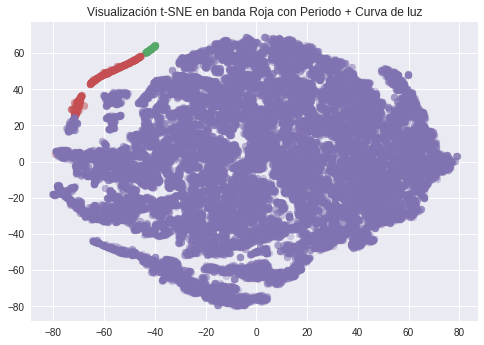

In [0]:
x_tsne = tSNE[:,0]
y_tsne = tSNE[:,1]
plt.scatter(x_tsne[Cluster0], y_tsne[Cluster0], c='C1', alpha=0.3)
plt.scatter(x_tsne[Cluster1], y_tsne[Cluster1], c='C2', alpha=0.3)
plt.scatter(x_tsne[Cluster2], y_tsne[Cluster2], c='C3', alpha=0.3)
plt.title('Visualización t-SNE en banda Roja con Periodo + Curva de luz')